In [1]:
from src.psk_modem import PSKModem
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

### Task 1

In [2]:
# settings
np.random.seed(0)
fs_hz = 1000
fc_hz =  50
symb_per_sec_no_mult = 15
symb_per_sec = 10
modulation = "qpsk"
num_transmit_bits = 24

In [3]:
bit_message = np.random.randint(low=0, high=2, size=num_transmit_bits)
modem_block = PSKModem(modulation)

In [4]:
# processing block
symbols = modem_block.map_symbols(bit_message)
signal1 = modem_block.modulate(bit_message, fs_hz, fc_hz, symb_per_sec)
signal2 = modem_block.modulate(bit_message, fs_hz, fc_hz, symb_per_sec_no_mult)
time_array1 = np.arange(0, len(signal1), 1) / fs_hz
time_array2 = np.arange(0, len(signal2), 1) / fs_hz
rec_bits1, metrics1 = modem_block.demodulate(signal1, fs_hz, fc_hz, symb_per_sec)
rec_bits2, metrics2 = modem_block.demodulate(signal1, fs_hz, fc_hz, symb_per_sec_no_mult)
print('Bit message: ', *bit_message)
print('Modulation symbols: ', *np.round(symbols, 2))
print('Demodulated bits1: ', *rec_bits1)
print('Demodulated metrics1: ', metrics1, 2)
print('Demodulated bits2: ', *rec_bits2)
print('Demodulated metrics2: ', metrics2)

Bit message:  0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0
Modulation symbols:  1j (-0-1j) (-1+0j) (-1+0j) (-1+0j) (-0-1j) 1j (1+0j) (1+0j) 1j 1j (-0-1j)
Demodulated bits1:  0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0
Demodulated metrics1:  {(0, 1): np.float64(-0.5000000000000001), (0, 0): np.float64(-3.7192471324942746e-17), (1, 0): np.float64(0.5000000000000001), (1, 1): np.float64(-6.494804694057165e-17)} 2
Demodulated bits2:  0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0
Demodulated metrics2:  {(0, 1): np.float64(-0.4182131713872838), (0, 0): np.float64(0.3127554919408029), (1, 0): np.float64(0.4182131713872837), (1, 1): np.float64(-0.312755491940803)}


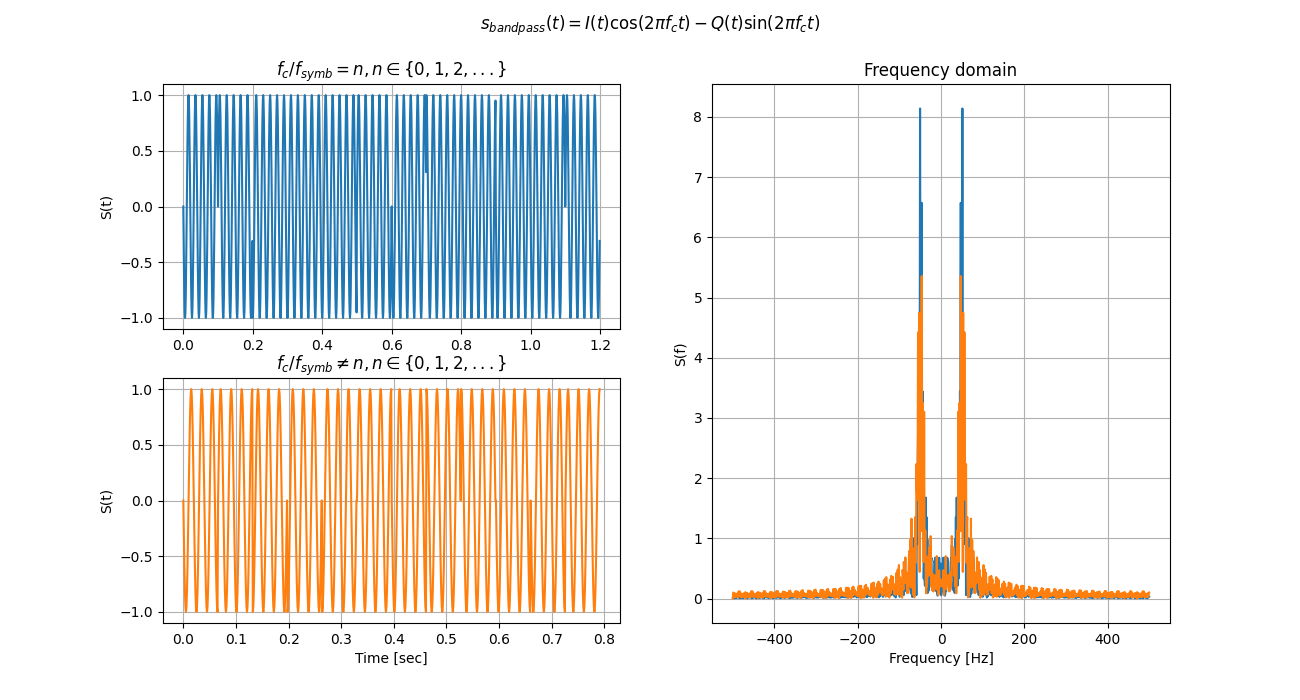

In [5]:
fig1_1 = plt.figure(figsize=(13,7))
fig1_1.suptitle(r'$s_{bandpass}(t)=I(t)\cos(2\pi f_c t)-Q(t)\sin(2\pi f_c t)$')
ax1 = fig1_1.add_subplot(221)

ax1.set_title(r"$f_c/f_{symb}=n, n \in \{0, 1, 2, ...\}$")
ax1.plot(time_array1, signal1, color="C0")
ax1.set_ylabel('S(t)')
ax1.grid()

ax2 = fig1_1.add_subplot(223)

ax2.set_title(r"$f_c/f_{symb}\neq n, n \in \{0, 1, 2, ...\}$")
ax2.plot(time_array2, signal2, color="C1")
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('S(t)')
ax2.grid()

ax3 = fig1_1.add_subplot(122)

ax3.set_title(r"Frequency domain")
n_fft = 1024
freqs = np.linspace(-fs_hz/2, fs_hz/2, n_fft)
ax3.plot(freqs, np.abs(np.fft.fftshift(np.fft.fft(signal1, norm="ortho", n=n_fft))), color="C0")
ax3.plot(freqs, np.abs(np.fft.fftshift(np.fft.fft(signal2, norm="ortho", n=n_fft))), color="C1")
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('S(f)')
ax3.grid()

### Task 2

In [6]:
shape_filter = GaussFilter(1/config['symb_per_sec'], int(config['fs_hz']/config['symb_per_sec']))
symbols_seq = modem_block.padded_symbols(bit_message, config['fs_hz'], config['symb_per_sec'])
output_baseband_signal = np.convolve(symbols_seq, shape_filter.h_impulse_response, mode='full')

time_samples = np.arange(0, len(output_baseband_signal), 1)/config['fs_hz']-2/config['symb_per_sec']

output_bandpass_signal = np.real(output_baseband_signal*np.exp(1j*2*np.pi*config['fc_hz']*time_samples))

NameError: name 'GaussFilter' is not defined

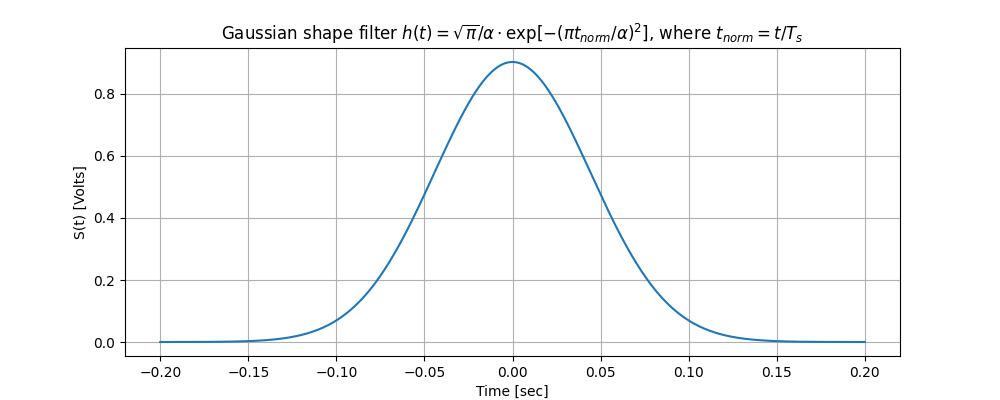

In [ ]:
fig2 = plt.figure(figsize=[10,4])
ax_1 = fig2.add_subplot(111)

ax_1.set_title(r'Gaussian shape filter $h(t)=\sqrt{\pi}/\alpha\cdot\exp[-(\pi t_{norm}/\alpha)^2]$, where $t_{norm}=t/T_s$')
ax_1.plot(shape_filter.get_abs_time(config['symb_per_sec']), shape_filter.h_impulse_response)
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.grid()

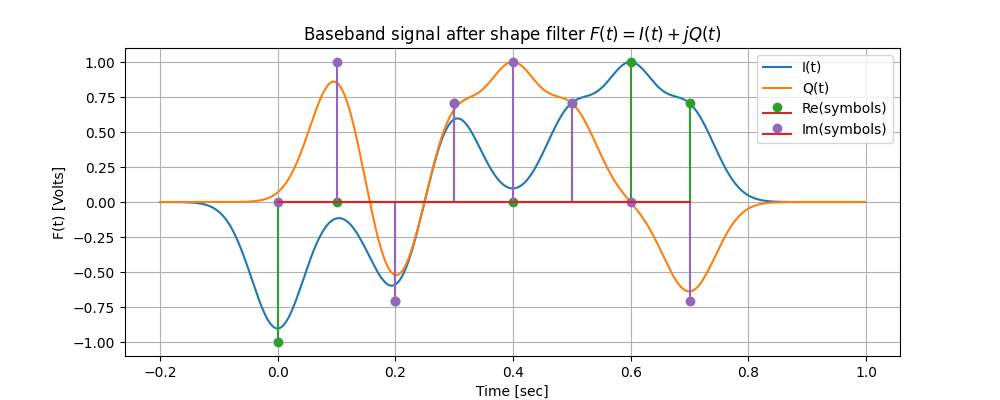

In [ ]:
fig3 = plt.figure(figsize=[10,4])
ax_1 = fig3.add_subplot(111)

ax_1.set_title(r'Baseband signal after shape filter $F(t)=I(t)+jQ(t)$')
ax_1.plot(time_samples, np.real(output_baseband_signal), label='I(t)')
ax_1.plot(time_samples, np.imag(output_baseband_signal), label='Q(t)')
ax_1.stem(np.arange(0, len(bit_message)//modem_block.get_bits_per_symbol())/config['symb_per_sec'], np.real(symbols), linefmt='C2-', markerfmt='C2o',label='Re(symbols)')
ax_1.stem(np.arange(0, len(bit_message)//modem_block.get_bits_per_symbol())/config['symb_per_sec'], np.imag(symbols), linefmt='C4-', markerfmt='C4o',label='Im(symbols)')
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('F(t) [Volts]')
ax_1.legend()
ax_1.grid()

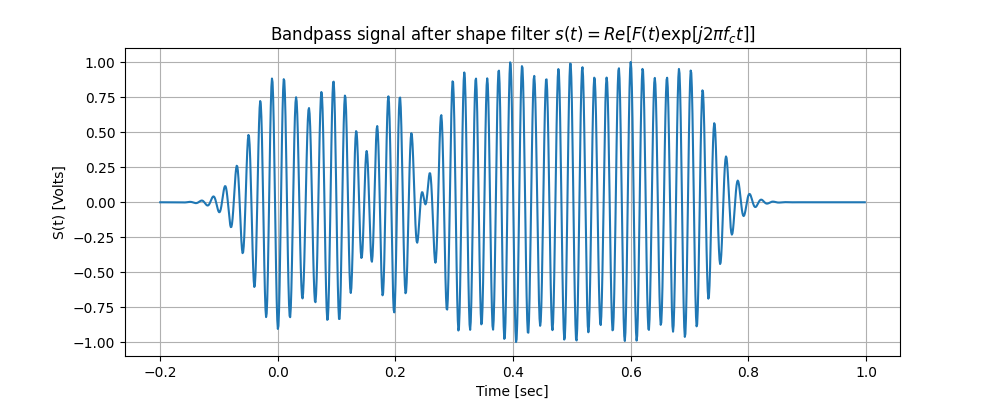

In [ ]:
fig4 = plt.figure(figsize=[10,4])
ax_1 = fig4.add_subplot(111)

ax_1.set_title(r'Bandpass signal after shape filter $s(t)=Re[F(t)\exp[j2\pi f_ct]]$')
ax_1.plot(time_samples, output_bandpass_signal)
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.grid()

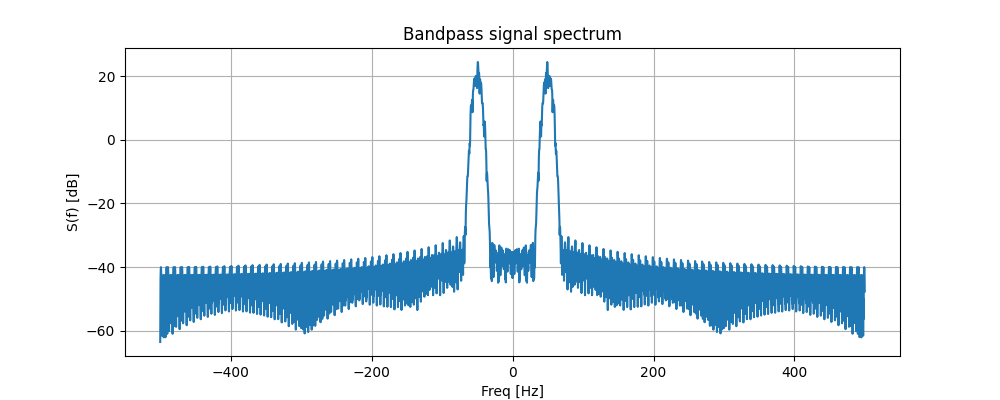

In [ ]:
N_fft = len(time_samples) * 4

fig4_1 = plt.figure(figsize=[10,4])
ax_1 = fig4_1.add_subplot(111)

ax_1.set_title(r'Bandpass signal spectrum')
ax_1.plot(1/(time_samples[1]-time_samples[0])/N_fft*np.arange(-N_fft/2,N_fft/2,1), 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(output_bandpass_signal, N_fft)))))
ax_1.set_xlabel('Freq [Hz]')
ax_1.set_ylabel('S(f) [dB]')
ax_1.grid()

### Task 3

In [ ]:
data_bpsk = np.load('src/data_bpsk.npy')
data_qpsk = np.load('src/data_qpsk.npy')
data_scramb = np.load('src/scramb.npy')

In [ ]:
bpsk_reduced = np.array(list([data_bpsk[i] for i in range(24, len(data_bpsk), 4)]))
bpsk_reduced = bpsk_reduced[:100]
qpsk_reduced = np.array(list([data_qpsk[i] for i in range(24, len(data_bpsk), 4)]))
qpsk_reduced = qpsk_reduced[:100]

In [ ]:
descr_seq = np.exp(-1j*2*np.pi/8*data_scramb)
descr_bpsk = bpsk_reduced*descr_seq
descr_qpsk = qpsk_reduced*descr_seq

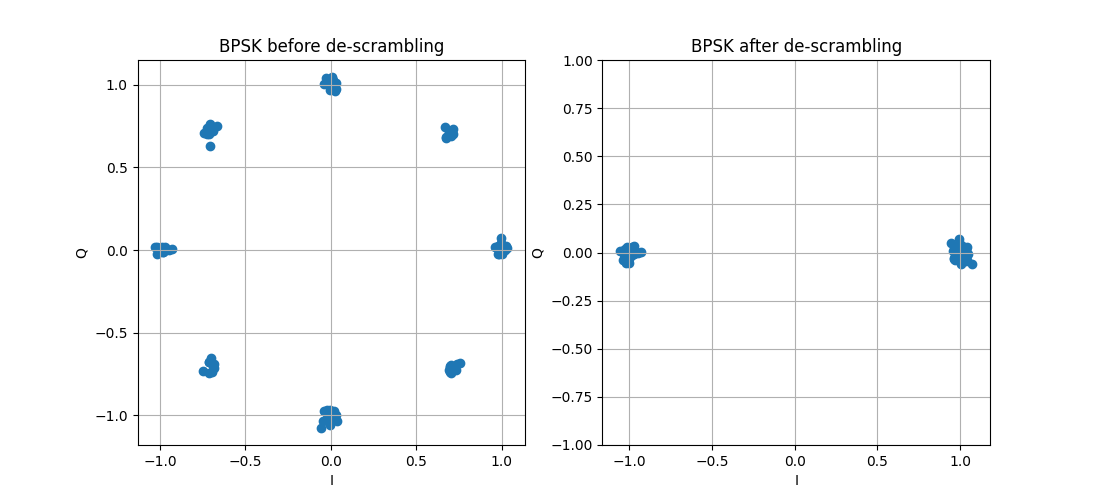

In [ ]:
fig5 = plt.figure(figsize=(11,5))

ax_1 = fig5.add_subplot(121)
ax_1.set_title(r'BPSK before de-scrambling')
ax_1.scatter(np.real(bpsk_reduced), np.imag(bpsk_reduced))
ax_1.set_xlabel('I')
ax_1.set_ylabel('Q')
ax_1.grid()

ax_2 = fig5.add_subplot(122)
ax_2.set_title(r'BPSK after de-scrambling')
ax_2.scatter(np.real(descr_bpsk), np.imag(descr_bpsk))
ax_2.set_xlabel('I')
ax_2.set_ylabel('Q')
ax_2.set_ylim([-1,1])
ax_2.grid()

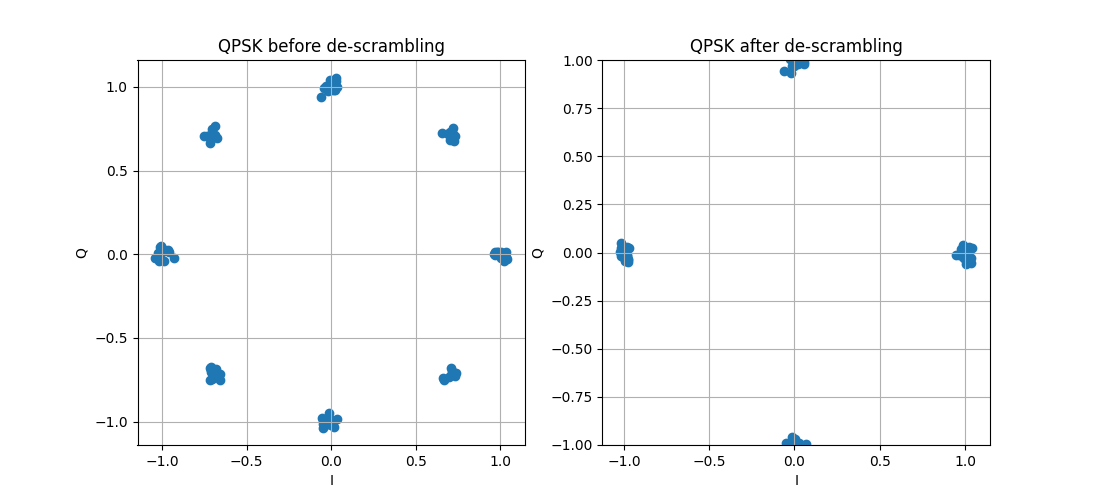

In [ ]:
fig6 = plt.figure(figsize=[11,5])

ax_1 = fig6.add_subplot(121)
ax_1.set_title(r'QPSK before de-scrambling')
ax_1.scatter(np.real(qpsk_reduced), np.imag(qpsk_reduced))
ax_1.set_xlabel('I')
ax_1.set_ylabel('Q')
ax_1.grid()

ax_2 = fig6.add_subplot(122)
ax_2.set_title(r'QPSK after de-scrambling')
ax_2.scatter(np.real(descr_qpsk), np.imag(descr_qpsk))
ax_2.set_xlabel('I')
ax_2.set_ylabel('Q')
ax_2.set_ylim([-1,1])
ax_2.grid()

In [ ]:
bpsk_message = modem_block.demap_symbols(descr_bpsk)
qpsk_message = modem_block.demap_symbols(descr_qpsk)
print('BPSK bits:',*bpsk_message)
print('QPSK bits:',*qpsk_message)

BPSK bits: 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0
QPSK bits: 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 